# Reinforcement Learning

The goal of RL is to learn an optimal policy $\pi^\ast$ for an *agent* operating in some environment $E$.

<div>
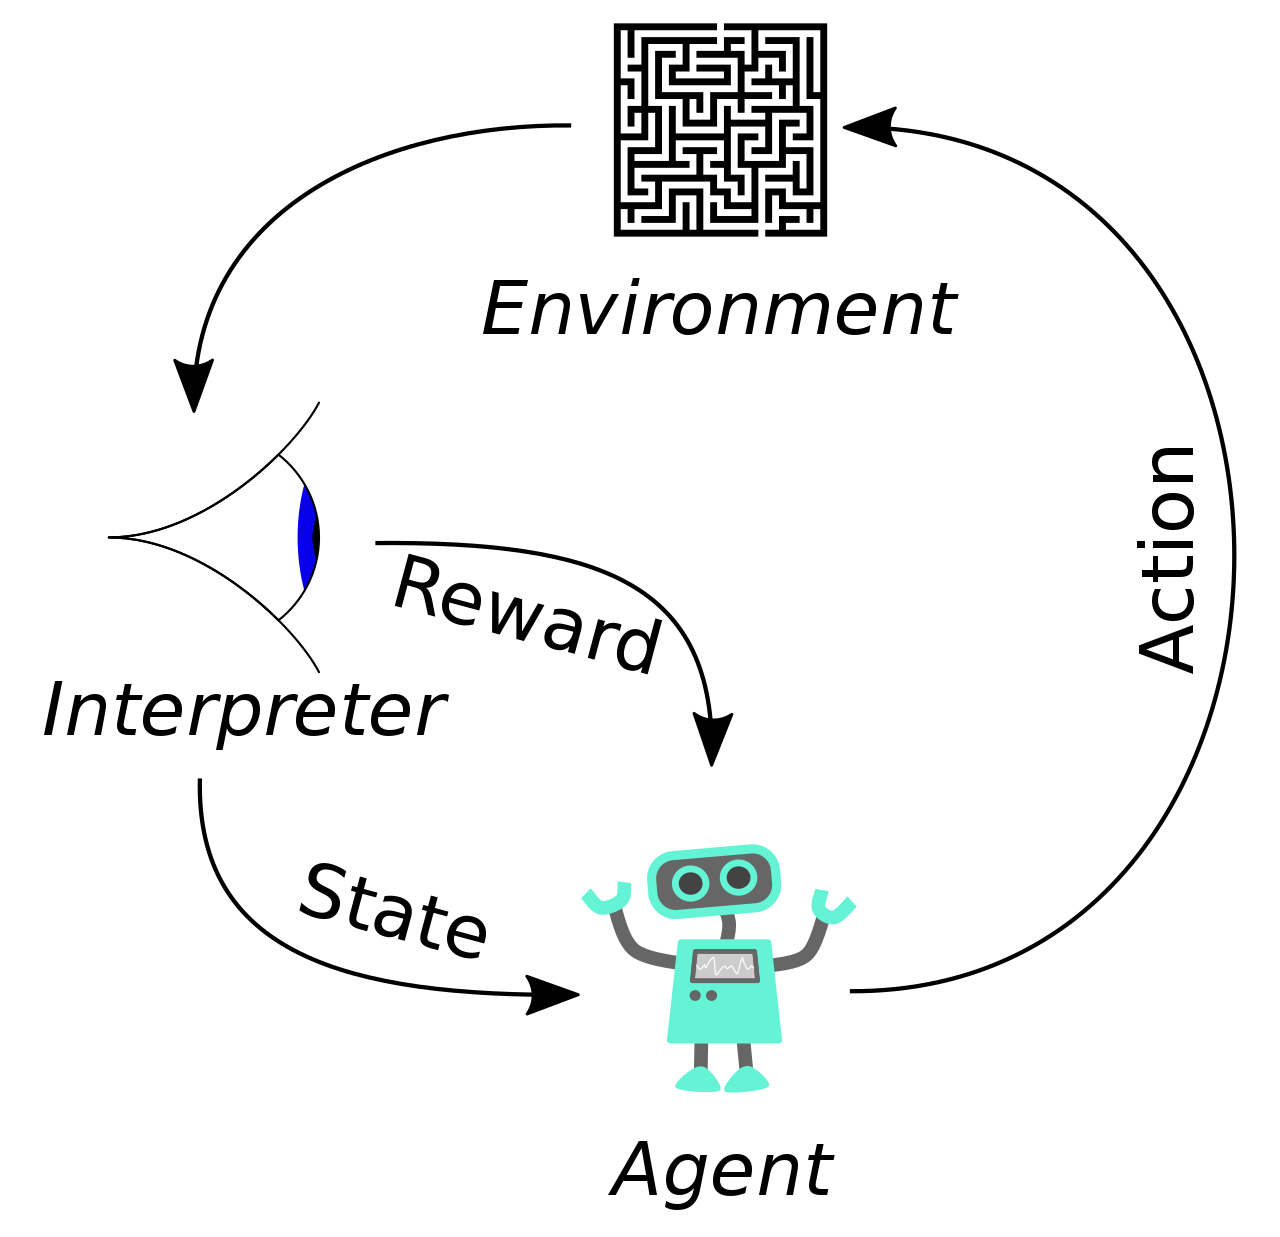
</div>

See: https://en.wikipedia.org/wiki/Reinforcement_learning

## Deep RL

Tabular RL is not suitable if the number of states is large (e.g. chess or image input) or continuous. In that case the Q-table can be replaced with a neural network that approximates the Q-values. A milestone work in this is

 * Volodymyr Mnih, Koray Kavukcuoglu, David Silver, Alex Graves, Ioannis Antonoglou, Daan Wierstra, Martin Riedmiller (2013): "Playing Atari With Deep Reinforcement Learning". In Proceedings of the NeurIPS Workshop on Deep Learning [PDF](http://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)
 
<div>
 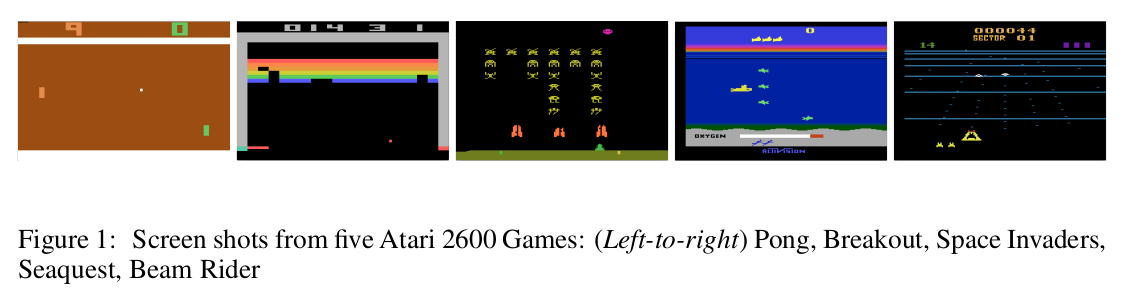
</div>

#### Continuous control problem: OpenAI CartPole

Let's load the necessary packages

In [1]:
import numpy as np # used for arrays
import gym # pull the environment
import time # to get the time
import math # needed for calculations

CartPole provides observations of the cart location in $[-4.8,+4.8]$ units, cart acceleration in $[-\infty,+\infty]$, pole angle in radians in $[-24^\circ,+24^\circ]$ and pole acceleration in in $[-\infty,+\infty]$. The control signal is a discrete "push" of the cart to the left, $a=0$, or right, $a=1$.

In [2]:
env = gym.make("CartPole-v1")
print(env.observation_space.low)
print(env.observation_space.high)
print(env.action_space)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Discrete(2)


Let's have an example run.

In [3]:
env.reset()
done = False
while not done:
    action = np.random.randint(0, 2) # Random action
    #action = 1 # Fixed action, 0 or 1
    new_state, reward, done, _ = env.step(action)
    print(action)
    print(new_state)
    print(reward)
    print(done)
    env.render()
    time.sleep(0.1)
env.close()

0
[ 0.04394558 -0.22322863  0.04241477  0.25920543]
1.0
False
0
[ 0.03948101 -0.41892964  0.04759888  0.5649591 ]
1.0
False
1
[ 0.03110241 -0.22450668  0.05889807  0.2876438 ]
1.0
False
0
[ 0.02661228 -0.42041692  0.06465094  0.59830564]
1.0
False
1
[ 0.01820394 -0.22625633  0.07661705  0.3266673 ]
1.0
False
1
[ 0.01367881 -0.03230406  0.0831504   0.05909576]
1.0
False
0
[ 0.01303273 -0.2285137   0.08433231  0.37681141]
1.0
False
1
[ 0.00846246 -0.03468443  0.09186854  0.1118651 ]
1.0
False
0
[ 0.00776877 -0.2309945   0.09410585  0.43205985]
1.0
False
1
[ 0.00314888 -0.03732222  0.10274704  0.17046314]
1.0
False
1
[ 0.00240244  0.15619048  0.1061563  -0.08812059]
1.0
False
1
[ 0.00552625  0.3496433   0.10439389 -0.34551492]
1.0
False
1
[ 0.01251911  0.5431373   0.09748359 -0.6035398 ]
1.0
False
0
[ 0.02338186  0.34679684  0.0854128  -0.28181255]
1.0
False
0
[0.03031779 0.15056701 0.07977655 0.03654004]
1.0
False
0
[ 0.03332914 -0.04560294  0.08050735  0.35328853]
1.0
False
0
[ 0.032417

## Q-learning and discretization

Q-learning needs discrete values so let's discretize the space observation space. Number of bins is important variable here. For example, 20 bins may converge well while 10 almost never.

In [4]:
np_array_window_size = np.array([0.25, 0.25, 0.01, 0.1])
num_of_bins = 40
cart_loc_bins = np.linspace(env.observation_space.low[0],env.observation_space.high[0],num_of_bins)
cart_acc_bins = np.linspace(-10,+10,num_of_bins)
pole_angle_bins = np.linspace(env.observation_space.low[2],env.observation_space.high[2],num_of_bins)
pole_acc_bins = np.linspace(-10,+10,num_of_bins)
def get_discrete_state(state):
    cart_loc = np.argmin(np.abs(cart_loc_bins-state[0]))
    cart_acc = np.argmin(np.abs(cart_acc_bins-state[1]))
    pole_ang = np.argmin(np.abs(pole_angle_bins-state[2]))
    pole_acc = np.argmin(np.abs(pole_acc_bins-state[3]))
    return tuple([cart_loc, cart_acc, pole_ang, pole_acc])
                         
    #discrete_state = state/np_array_window_size+ np.array([15,10,1,10])
    #return tuple(discrete_state.astype(np.int))

Let's re-run with discrete states. By running the code with actions 0 and 1 several times, we found that during the valid episode step (done is False) the indeces run from -14..14, -14..14, -19..+19, 

In [5]:
env.reset()
done = False
while not done:
    action = np.random.randint(0, 2)
    #action = 1
    new_state, reward, done, _ = env.step(action)
    print(get_discrete_state(new_state))
    print(reward)
    print(done)
    env.render()
    time.sleep(0.1)
env.close()

(20, 19, 21, 20)
1.0
False
(20, 20, 22, 19)
1.0
False
(20, 20, 22, 19)
1.0
False
(20, 20, 21, 18)
1.0
False
(20, 20, 21, 19)
1.0
False
(20, 20, 20, 20)
1.0
False
(20, 20, 21, 19)
1.0
False
(20, 20, 20, 20)
1.0
False
(20, 20, 20, 19)
1.0
False
(20, 20, 20, 18)
1.0
False
(20, 20, 20, 19)
1.0
False
(20, 20, 19, 20)
1.0
False
(20, 19, 20, 20)
1.0
False
(20, 20, 20, 20)
1.0
False
(20, 19, 20, 20)
1.0
False
(20, 20, 20, 20)
1.0
False
(20, 20, 20, 19)
1.0
False
(20, 20, 20, 19)
1.0
False
(20, 21, 20, 18)
1.0
False
(20, 21, 19, 17)
1.0
False
(20, 21, 18, 18)
1.0
False
(20, 21, 17, 17)
1.0
False
(20, 21, 16, 17)
1.0
False
(20, 21, 15, 17)
1.0
False
(20, 21, 14, 17)
1.0
False
(20, 21, 12, 17)
1.0
False
(20, 21, 11, 17)
1.0
False
(20, 22, 10, 16)
1.0
False
(20, 22, 8, 15)
1.0
True


In [6]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 40000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]


epsilon = 1

epsilon_decay_value = 0.99995

In [7]:
#q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))

q_table = np.random.uniform(low=0, high=1, size=(num_of_bins, num_of_bins, num_of_bins, num_of_bins, env.action_space.n))

q_table.shape

(40, 40, 40, 40, 2)

In [8]:

for episode in range(EPISODES + 1): # go through the episodes
    t0 = time.time() # set the initial time
    discrete_state = get_discrete_state(env.reset()) # get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 # reward starts as 0 for each episode

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state]) # take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) # do a random ation

        #c = env.step(action) # step action to get new states, reward, and the "done" status.
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward # add the reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: # render
            env.render()

        if not done: # update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: # epsilon modification
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)
    
            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() # episode has finished
    episode_total = t1 - t0 # episode total time
    total = total + episode_total

    total_reward += episode_reward # episode total reward
    prior_reward = episode_reward

    if episode % 1000 == 0: # every 1000 episodes print the average time and the average reward
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

Episode: 0
Time Average: 0.0005107989311218262
Mean Reward: 0.025
Time Average: 0.0021196815967559814
Mean Reward: 22.217
Episode: 2000
Time Average: 0.002478745937347412
Mean Reward: 22.068
Time Average: 0.0021916418075561524
Mean Reward: 22.514
Episode: 4000
Time Average: 0.0025691702365875243
Mean Reward: 22.031
Time Average: 0.0021916427612304686
Mean Reward: 22.207
Episode: 6000
Time Average: 0.0023398993015289306
Mean Reward: 22.159
Time Average: 0.0021817517280578614
Mean Reward: 22.621
Episode: 8000
Time Average: 0.0026460275650024415
Mean Reward: 22.165
Time Average: 0.0021746516227722167
Mean Reward: 21.797
Episode: 10000
Time Average: 0.002456990957260132
Mean Reward: 22.593
Epsilon: 0.9753093024395111
Time Average: 0.002441483974456787
Mean Reward: 23.652
Episode: 12000
Epsilon: 0.9048351558698463
Time Average: 0.0036938800811767577
Mean Reward: 25.953
Time Average: 0.004572991371154785
Mean Reward: 28.414
Epsilon: 0.8394533480303666
Episode: 14000
Time Average: 0.005224155

Let's test how well it works

In [9]:
new_state = env.reset()
print(new_state)
for s in range(0,200):
    #action = np.random.randint(0, 2)
    discrete_state = get_discrete_state(new_state)
    action = np.argmax(q_table[discrete_state])
    new_state, reward, done, _ = env.step(action)
    print(get_discrete_state(new_state))
    print(reward)
    print(done)
    env.render()
    time.sleep(0.1)
env.close()

[ 0.04444656 -0.0273043  -0.03505049  0.00258336]
(20, 20, 18, 19)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(20, 19, 18, 19)
1.0
False
(20, 19, 18, 20)
1.0
False
(19, 19, 18, 19)
1.0
False
(19, 19, 18, 20)
1.0
False
(19, 19, 18, 19)
1.0
False
(19, 19, 18, 20)
1.0
False
(19, 19, 18, 19)
1.0
False
(19, 19, 18, 20)
1.0
False
(19, 19, 18, 19)
1.0
False
(19, 19, 17, 19)
1.0
False
(19, 19, 17, 20)
1.0
False
(19, 18, 18, 21)
1.0
False
(19, 19, 18, 20)
1.0
False
(19, 19, 18, 19)
1.0
False
(19, 19, 18, 20)
1.0
False
(19, 19, 18, 19)
1.0
False
(19, 

C:\Users\mahad\anaconda3\envs\DATAML200\lib\site-packages\gym\envs\classic_control\cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


(12, 18, 30, 21)
0.0
True
(12, 18, 31, 20)
0.0
True
(12, 18, 31, 21)
0.0
True
(12, 18, 32, 22)
0.0
True
(12, 17, 33, 22)
0.0
True
(12, 17, 34, 23)
0.0
True
(12, 17, 36, 23)
0.0
True
(12, 17, 37, 23)
0.0
True
(12, 17, 39, 23)
0.0
True


It might be useful to think why epsilon sampling (with low value) might still be useful when the controller (policy) is used in real case?

### Demo 3: CartPole using Deep Q-Learning (DQN)

<div>
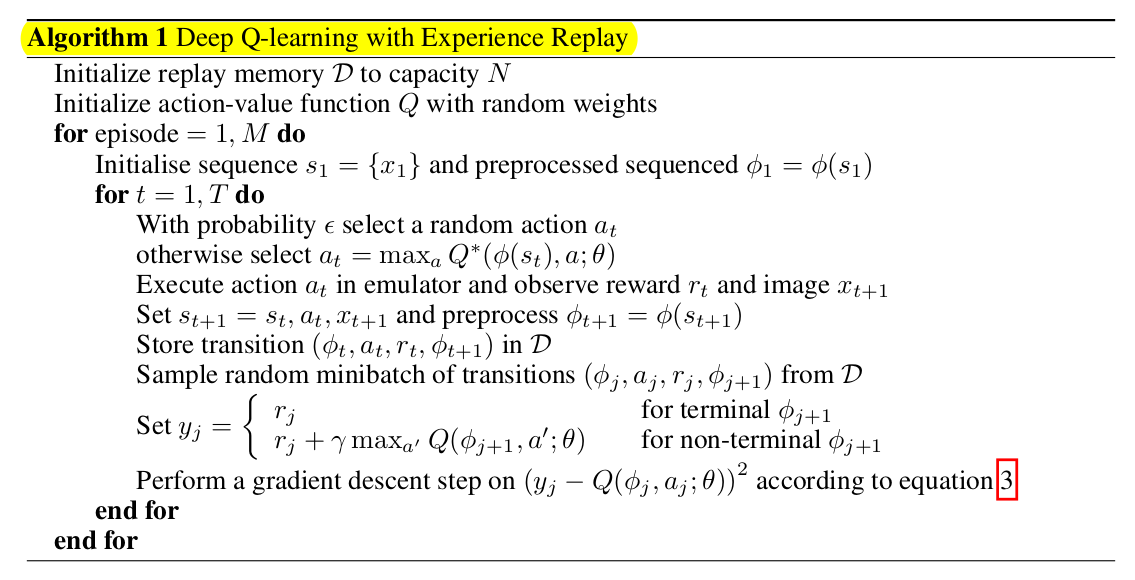
</div>
    
In this demo we use the Deep Q-Learning Network proposed by Mnih et al. in 2013. Their idea allowed the fundamental algorithms that helped computers to learn play computer games just by playing them and collecting experiences to train a deep network policy. In their case input is the current image of game that cannot anymore be discretized but needs to be treated as continuous state. In this case $Q(s,a)$ depends on continuous $D$-dimensional state $s \in \mathbb{R}^D$ and discrete actions $a = 0, 1, 2, \ldots$ that can be encoded as one-hot input.

See https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [3]:
import numpy as np # used for arrays
import gym # pull the environment
import time # to get the time
import math # needed for calculations
import time

In [4]:
env = gym.make("CartPole-v1")
print(env.observation_space.low)
print(env.observation_space.high)
print(env.action_space)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Discrete(2)


In [5]:
#initializer = tf.keras.initializers.Zeros()
#
#model = tf.keras.models.Sequential([
#  tf.keras.layers.InputLayer(input_shape=(4,)),
#  tf.keras.layers.Dense(32, activation='relu', kernel_initializer=initializer),
#  tf.keras.layers.Dense(32, activation='relu', kernel_initializer=initializer),
#  tf.keras.layers.Dense(2, activation='linear', kernel_initializer=initializer)
#])

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(4,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='linear')
])

In [6]:
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


Let's test using initial network

In [7]:
def eval_dqn(dqn_, num_of_episodes_, max_steps_):
    env.reset()
    total_test_episodes = 1000
    rewards = []

    for episode in range(num_of_episodes_):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0

        for step in range(max_steps_):
            action = np.argmax(dqn_.predict(state.reshape(1,-1)))
            new_state, reward, done, info = env.step(action)
            total_rewards += reward
        
            if done:
                break
            state = new_state
        rewards.append(total_rewards)
    env.close()
    avg_reward = sum(rewards)/num_of_episodes_
    return avg_reward

In [8]:
print(f'Current DQN perf {eval_dqn(model,10,50)}')

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
Current DQN perf 16.0


In [9]:
new_state = np.array(env.reset())
done = False
while not done:
    print(model.predict(new_state.reshape(1,-1)))
    action = np.argmax(model.predict(new_state.reshape(1,-1)))
    print(action)
    new_state, reward, done, _ = env.step(action)
    print(new_state)
    print(reward)
    print(done)
    env.render()
    time.sleep(0.1)
env.close()

1/1 [==============================] - 0s 22ms/step
[[-0.00942158  0.00631413]]
1/1 [==============================] - 0s 18ms/step
1
[-0.02335898  0.18435729  0.02106425 -0.31986877]
1.0
False
1/1 [==============================] - 0s 19ms/step
[[-0.01918588 -0.02005647]]
1/1 [==============================] - 0s 21ms/step
0
[-0.01967183 -0.01105822  0.01466687 -0.0206181 ]
1.0
False
1/1 [==============================] - 0s 28ms/step
[[-0.00748055  0.00649698]]
1/1 [==============================] - 0s 28ms/step
1
[-0.019893    0.18385035  0.01425451 -0.30863762]
1.0
False
1/1 [==============================] - 0s 26ms/step
[[-0.0186877  -0.01818962]]
1/1 [==============================] - 0s 25ms/step
1
[-0.01621599  0.37876633  0.00808176 -0.5967912 ]
1.0
False
1/1 [==============================] - 0s 13ms/step
[[-0.03768204 -0.03011976]]
1/1 [==============================] - 0s 12ms/step
1
[-0.00864066  0.5737743  -0.00385406 -0.88691753]
1.0
False
1/1 [=========================

DQN main loop

In [10]:
num_of_episodes = 1000
gamma = 0.9
epsilon = 1.0
epsilon_decay_value = 0.99995

total_reward = 0
prior_reward = 0

buffer_size = 10000
tr_batch_size = 100
tr_freq = 10

state_buffer = np.zeros((buffer_size,4))
reward_buffer = np.zeros((buffer_size,1))
action_buffer = np.zeros((buffer_size,1))
done_buffer = np.zeros((buffer_size,1))
new_state_buffer = np.zeros((buffer_size,4))

buffer_count = 0
buffer_full = False
for episode in range(num_of_episodes): # go through the episodes

    state = env.reset()
    done = False
    episode_reward = 0 # reward starts as 0 for each episode

    if episode % 100 == 0: 
        print("Episode: " + str(episode))

    while not done: 
        
        # Q-net prediction
        Q_net_pred = model.predict(state.reshape(1,-1))

        # Select random or prediction        
        if np.random.random() > epsilon:
            action = np.argmax(Q_net_pred)
        else:
            action = np.random.randint(0, env.action_space.n) # do a random ation

        new_state, reward, done, _ = env.step(action)
        episode_reward += reward # add the reward
        
        # Store buffer variables
        if buffer_count < buffer_size:
            buf_ind = buffer_count
        else:
            buffer_count = 0
            buf_ind = buffer_count
            buffer_full = True
            
        state_buffer[buf_ind,:] = state
        action_buffer[buf_ind] = action
        reward_buffer[buf_ind] = reward
        new_state_buffer[buf_ind,:] = new_state
        done_buffer[buf_ind] = done
        
        # Increments
        state = new_state
        buffer_count = buffer_count+1

    if epsilon > 0.05: # epsilon modification
        if episode_reward > prior_reward and episode > 1000:
            epsilon = math.pow(epsilon_decay_value, episode - 1000)
            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    total_reward += episode_reward # episode total reward
    prior_reward = episode_reward

    if buffer_full and episode % tr_freq == 0: 
        # Train network
        X = np.zeros((tr_batch_size,4))
        Y = np.zeros((tr_batch_size,2))
        for ind, tr_ind in enumerate(np.random.randint(buffer_size,size=tr_batch_size)):
            X[ind,:] = state_buffer[tr_ind,:]
            Y[ind,:] = model.predict(X[ind,:].reshape(1,-1))
            if done_buffer[tr_ind]:
                Y[ind, int(action_buffer[tr_ind])] = reward
            else:                
                Y[ind, int(action_buffer[tr_ind])] = reward+gamma*np.max(model.predict(new_state_buffer[tr_ind,:].reshape(1,-1)))
        
        model.fit(X,Y,epochs=4,verbose=1)
        #model.fit(X,Y,verbose=1)
        
    if episode % 100 == 0: # every 1000 episodes print the average time and the average reward
        print(f'Current DQN perf {eval_dqn(model,10,50)}')

    if episode % 1000 == 0: # every 1000 episodes print the average time and the average reward
        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0
 
env.close()

Episode: 0
1/1 [==============================] - 0s 20ms/step
Current DQN perf 13.3
Mean Reward: 0.017
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 23ms/step
Episode: 100
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 35ms/step


KeyboardInterrupt: 

## References

 * R.S. Sutton and A.G. Barto (2021): Reinforcement Learning: An Introduction. 2n ed. URL: http://incompleteideas.net/book/the-book.html 
 * Ali Fakhry (2020): "Using Q-Learning for OpenAI’s CartPole-v1" Blog Post. URL: https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df
 * Greg Surma: "Cartpole - Introduction to Reinforcement Learning (DQN - Deep Q-Learning)" Blog post. URL: https://gsurma.medium.com/cartpole-introduction-to-reinforcement-learning-ed0eb5b58288
